In [226]:
import pandas as pd
import numpy as np

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
from datetime import datetime, timedelta
from dateutil import relativedelta

In [229]:
df = pd.read_csv("Smoke_House_Google_Reviews.csv")

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   query                                1722 non-null   object 
 1   name                                 1722 non-null   object 
 2   google_id                            1722 non-null   object 
 3   place_id                             1722 non-null   object 
 4   location_link                        1722 non-null   object 
 5   reviews_link                         1722 non-null   object 
 6   reviews_per_score                    1722 non-null   object 
 7   reviews                              1722 non-null   int64  
 8   rating                               1722 non-null   float64
 9   review_id                            1722 non-null   object 
 10  author_link                          1722 non-null   object 
 11  author_title                  

In [231]:
df.describe()

,reviews,rating,owner_answer_timestamp,review_rating,review_timestamp,review_likes,reviews_id
count,1722.0,1.722000e+03,5.420000e+02,1722.000000,1.722000e+03,1722.000000,1.722000e+03
mean,1722.0,4.400000e+00,1.615743e+09,4.386179,1.617665e+09,0.880952,-3.366351e+18
std,0.0,1.332655e-13,3.587611e+07,1.055736,3.538155e+07,1.036407,1.316222e+05
min,1722.0,4.400000e+00,1.553254e+09,1.000000,1.552980e+09,0.000000,-3.366351e+18
25%,1722.0,4.400000e+00,1.581081e+09,4.000000,1.579928e+09,0.000000,-3.366351e+18
50%,1722.0,4.400000e+00,1.636883e+09,5.000000,1.631205e+09,1.000000,-3.366351e+18
75%,1722.0,4.400000e+00,1.642868e+09,5.000000,1.648475e+09,1.000000,-3.366351e+18
max,1722.0,4.400000e+00,1.660479e+09,5.000000,1.661161e+09,8.000000,-3.366351e+18


In [232]:
df

,query,name,google_id,place_id,location_link,reviews_link,reviews_per_score,reviews,rating,review_id,...,review_img_url,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id
0,https://www.goog...,The Ranch Smokeh...,0x12a4a30de709af...,ChIJ168J5w2jpBIR...,https://www.goog...,https://search.g...,"{""1"": 82, ""2"": 4...",1722,4.4,ChZDSUhNMG9nS0VJ...,...,https://lh5.goog...,NaN,NaN,NaN,https://www.goog...,5,1661161121,08/22/2022 09:38:41,0,-3366350722704842035
1,https://www.goog...,The Ranch Smokeh...,0x12a4a30de709af...,ChIJ168J5w2jpBIR...,https://www.goog...,https://search.g...,"{""1"": 82, ""2"": 4...",1722,4.4,ChZDSUhNMG9nS0VJ...,...,https://lh5.goog...,NaN,NaN,NaN,https://www.goog...,5,1661152489,08/22/2022 07:14:49,1,-3366350722704842035
2,https://www.goog...,The Ranch Smokeh...,0x12a4a30de709af...,ChIJ168J5w2jpBIR...,https://www.goog...,https://search.g...,"{""1"": 82, ""2"": 4...",1722,4.4,ChZDSUhNMG9nS0VJ...,...,https://lh3.goog...,NaN,NaN,NaN,https://www.goog...,4,1661120357,08/21/2022 22:19:17,0,-3366350722704842035
3,https://www.goog...,The Ranch Smokeh...,0x12a4a30de709af...,ChIJ168J5w2jpBIR...,https://www.goog...,https://search.g...,"{""1"": 82, ""2"": 4...",1722,4.4,ChdDSUhNMG9nS0VJ...,...,https://lh3.goog...,NaN,NaN,NaN,https://www.goog...,5,1661114131,08/21/2022 20:35:31,1,-3366350722704842035
4,https://www.goog...,The Ranch Smokeh...,0x12a4a30de709af...,ChIJ168J5w2jpBIR...,https://www.goog...,https://search.g...,"{""1"": 82, ""2"": 4...",1722,4.4,ChZDSUhNMG9nS0VJ...,...,https://lh5.goog...,NaN,NaN,NaN,https://www.goog...,5,1661097601,08/21/2022 16:00:01,1,-3366350722704842035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,https://www.goog...,The Ranch Smokeh...,0x12a4a30de709af...,ChIJ168J5w2jpBIR...,https://www.goog...,https://search.g...,"{""1"": 82, ""2"": 4...",1722,4.4,ChZDSUhNMG9nS0VJ...,...,https://lh3.goog...,(Translated by G...,1.553501e+09,03/25/2019 07:56:08,https://www.goog...,5,1553347909,03/23/2019 13:31:49,3,-3366350722704842035
1718,https://www.goog...,The Ranch Smokeh...,0x12a4a30de709af...,ChIJ168J5w2jpBIR...,https://www.goog...,https://search.g...,"{""1"": 82, ""2"": 4...",1722,4.4,ChdDSUhNMG9nS0VJ...,...,https://lh3.goog...,(Translated by G...,1.553500e+09,03/25/2019 07:53:14,https://www.goog...,5,1553340937,03/23/2019 11:35:37,0,-3366350722704842035
1719,https://www.goog...,The Ranch Smokeh...,0x12a4a30de709af...,ChIJ168J5w2jpBIR...,https://www.goog...,https://search.g...,"{""1"": 82, ""2"": 4...",1722,4.4,ChdDSUhNMG9nS0VJ...,...,https://lh3.goog...,(Translated by G...,1.553254e+09,03/22/2019 11:27:46,https://www.goog...,5,1553250664,03/22/2019 10:31:04,4,-3366350722704842035
1720,https://www.goog...,The Ranch Smokeh...,0x12a4a30de709af...,ChIJ168J5w2jpBIR...,https://www.goog...,https://search.g...,"{""1"": 82, ""2"": 4...",1722,4.4,ChdDSUhNMG9nS0VJ...,...,https://lh3.goog...,(Translated by G...,1.553500e+09,03/25/2019 07:51:56,https://www.goog...,5,1553171051,03/21/2019 12:24:11,4,-3366350722704842035


In [233]:
df['reviews_per_score'].iloc[0]

'{"1": 82, "2": 49, "3": 116, "4": 350, "5": 1125}'

In [234]:
df.shape

(1722, 25)

In [235]:
df.columns

Index(['query', 'name', 'google_id', 'place_id', 'location_link',
       'reviews_link', 'reviews_per_score', 'reviews', 'rating', 'review_id',
       'author_link', 'author_title', 'author_id', 'author_image',
       'review_text', 'review_img_url', 'owner_answer',
       'owner_answer_timestamp', 'owner_answer_timestamp_datetime_utc',
       'review_link', 'review_rating', 'review_timestamp',
       'review_datetime_utc', 'review_likes', 'reviews_id'],
      dtype='object')

In [236]:
df.drop(['query', 'name', 'google_id', 'place_id', 'location_link',
       'reviews_link', 'reviews_per_score', 'reviews','rating','review_id',
       'author_link','author_image','author_id','review_img_url',
       'review_link','reviews_id'],axis=1,inplace=True)

In [237]:
df[::-1].head(3)

,author_title,review_text,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_rating,review_timestamp,review_datetime_utc,review_likes
1721,J T,(Translated by G...,(Translated by G...,1.553500e+09,03/25/2019 07:46:37,5,1552979684,03/19/2019 07:14:44,4
1720,Ruben Vaquero,(Translated by G...,(Translated by G...,1.553500e+09,03/25/2019 07:51:56,5,1553171051,03/21/2019 12:24:11,4
1719,Edu Martinez,(Translated by G...,(Translated by G...,1.553254e+09,03/22/2019 11:27:46,5,1553250664,03/22/2019 10:31:04,4


In [238]:
df.describe()

,owner_answer_timestamp,review_rating,review_timestamp,review_likes
count,5.420000e+02,1722.000000,1.722000e+03,1722.000000
mean,1.615743e+09,4.386179,1.617665e+09,0.880952
std,3.587611e+07,1.055736,3.538155e+07,1.036407
min,1.553254e+09,1.000000,1.552980e+09,0.000000
25%,1.581081e+09,4.000000,1.579928e+09,0.000000
50%,1.636883e+09,5.000000,1.631205e+09,1.000000
75%,1.642868e+09,5.000000,1.648475e+09,1.000000
max,1.660479e+09,5.000000,1.661161e+09,8.000000


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   author_title                         1722 non-null   object 
 1   review_text                          1143 non-null   object 
 2   owner_answer                         542 non-null    object 
 3   owner_answer_timestamp               542 non-null    float64
 4   owner_answer_timestamp_datetime_utc  542 non-null    object 
 5   review_rating                        1722 non-null   int64  
 6   review_timestamp                     1722 non-null   int64  
 7   review_datetime_utc                  1722 non-null   object 
 8   review_likes                         1722 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 121.2+ KB


In [240]:
df.isna().sum()

author_title                              0
review_text                             579
owner_answer                           1180
owner_answer_timestamp                 1180
owner_answer_timestamp_datetime_utc    1180
review_rating                             0
review_timestamp                          0
review_datetime_utc                       0
review_likes                              0
dtype: int64

In [241]:
#df[df['owner_answer'].notna()].head()

In [242]:
df['text_yn'] = df['review_text'].apply(lambda x: 'no' if x!=x else 'yes')
df['anwser_yn'] = df['owner_answer'].apply(lambda x: 'no' if x!=x else 'yes')
print(df['text_yn'].value_counts())
print(df['anwser_yn'].value_counts())

yes    1143
no      579
Name: text_yn, dtype: int64
no     1180
yes     542
Name: anwser_yn, dtype: int64


In [243]:
df[df['text_yn']=='yes']['review_text'].isna().value_counts()

False    1143
Name: review_text, dtype: int64

In [244]:
df.head()

,author_title,review_text,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_rating,review_timestamp,review_datetime_utc,review_likes,text_yn,anwser_yn
0,Christian Díaz,(Translated by G...,NaN,NaN,NaN,5,1661161121,08/22/2022 09:38:41,0,yes,no
1,Gabriela Santiana,Delicioso todo.....,NaN,NaN,NaN,5,1661152489,08/22/2022 07:14:49,1,yes,no
2,Meir Cohen,Great restaurant...,NaN,NaN,NaN,4,1661120357,08/21/2022 22:19:17,0,yes,no
3,kaka kaka,Está demasiado b...,NaN,NaN,NaN,5,1661114131,08/21/2022 20:35:31,1,yes,no
4,Alberto Martinez,(Translated by G...,NaN,NaN,NaN,5,1661097601,08/21/2022 16:00:01,1,yes,no


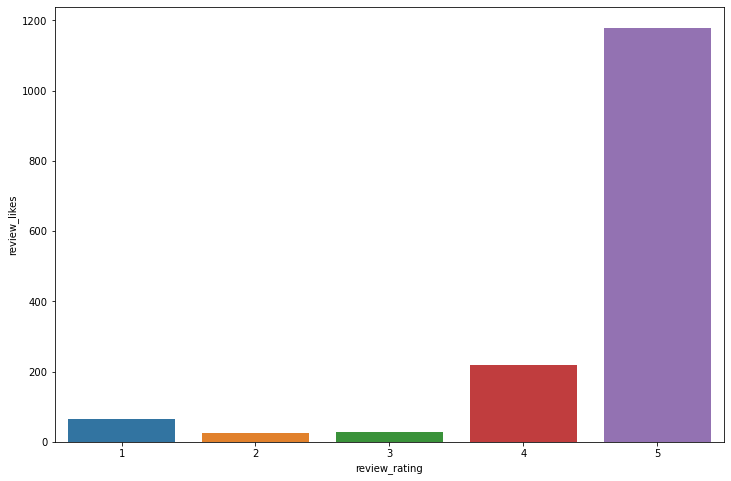

In [245]:
plt.figure(figsize=(12,8))
sns.barplot(x=df.groupby('review_rating').sum().index,y=df.groupby('review_rating').sum()['review_likes'])
plt.savefig('Pics/stars.jpg',bbox_inches='tight',dpi=200)

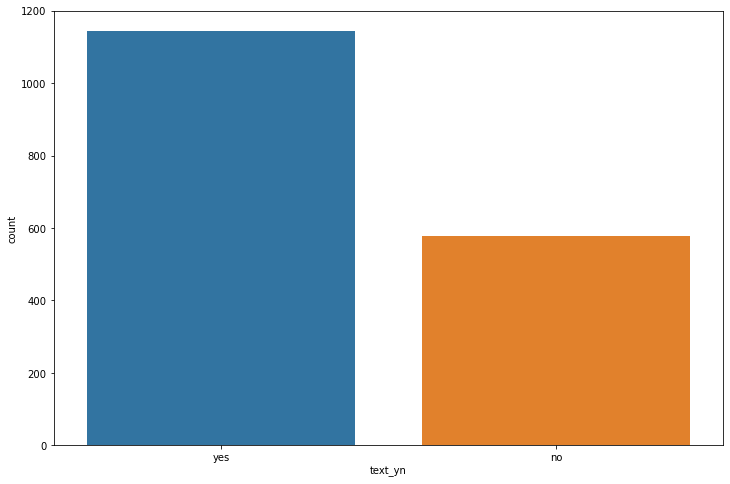

In [246]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='text_yn')
#plt.show()
plt.savefig('Pics/text_yn.jpg',bbox_inches='tight',dpi=200)


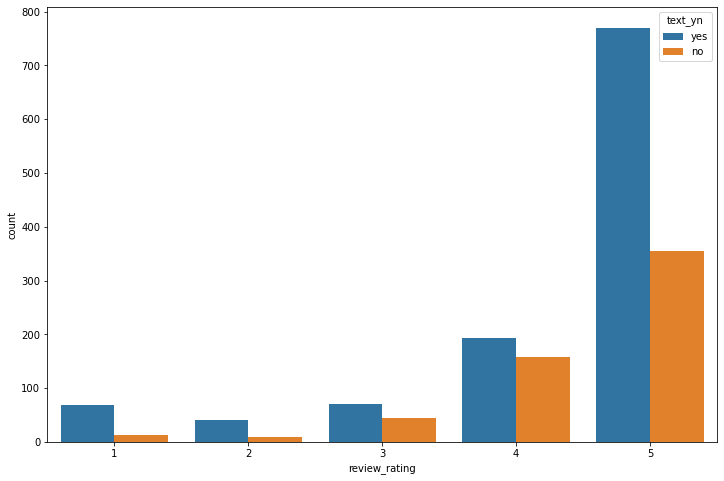

In [247]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='review_rating',hue='text_yn')
plt.savefig('Pics/review_rating_text_yn.jpg',bbox_inches='tight',dpi=200)

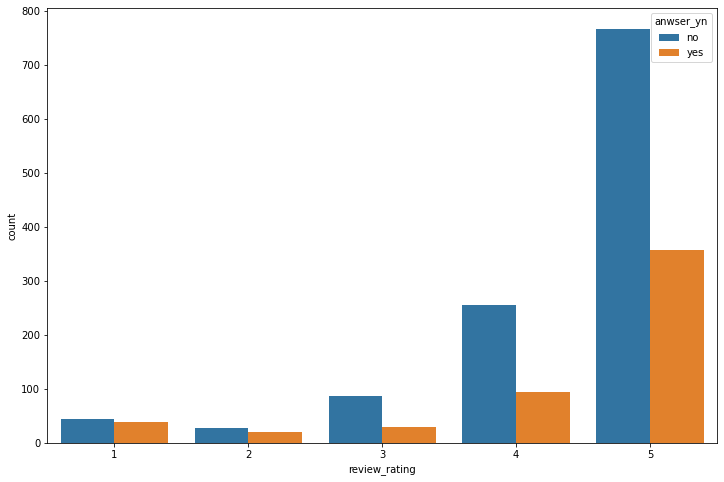

In [248]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='review_rating',hue='anwser_yn')
plt.savefig('Pics/review_rating_answers.jpg',bbox_inches='tight',dpi=200)

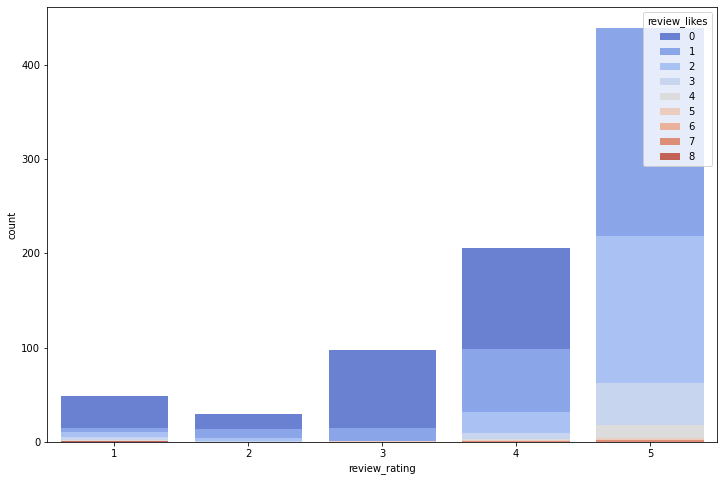

In [249]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='review_rating',hue='review_likes',dodge=False,palette="coolwarm")
plt.savefig('Pics/review_rating_likes.jpg',bbox_inches='tight',dpi=200)

In [250]:
max_likes_1 = df[df['review_rating']==1]['review_likes'].max()
print(max_likes_1)
pd.options.display.max_colwidth = 1000
print(df[df['review_likes']==max_likes_1]['review_text'])

8
793    (Translated by Google) DISASTROUS! There were 8 of us and after waiting 1 hour and a half, they forgot our command. When it finally arrived, half the burgers were cold and inedible, and the bread was breaking (reheated) and we had to send them back. The fries were dry, refried, and oily. In addition, they were wrong in the companions.\nThe service was relatively friendly, although the Asian-looking waiter hesitated at my friend and was extremely unprofessional.\n\nWhoever takes a lot of space, the less he tightens up!!\n\n(Original)\nDESASTROSO! Éramos 8 y después de esperar 1 hora y media, se olvidaron nuestra comanda. Cuando por fín llegó, la mitad de hamburguesas estaban frías e incomibles, y el pan se rompía (recalentado) y las tuvimos que devolver. Las patatas fritas estaban secas, refritas y aceitosas. Además,se equivocaron en los acompañantes.\nEl servicio fue relativamente simpático, aunque el camarero de aspecto asiático vaciló a mi amigo y fue extremadamente poco pro

In [251]:
max_likes_5 = df[df['review_rating']==5]['review_likes'].max()
print(max_likes_5)
pd.options.display.max_colwidth = 1000
print(df[df['review_likes']==max_likes_5]['review_text'])

7
242    (Translated by Google) Impressive quantity and quality of burgers! Undoubtedly one of the best hamburger restaurants in Barcelona.\nI loved the flavor of the meat , with a touch of grilled meat that was not lost despite the extra ingredients and sauces .\nIn addition, the size of the hamburgers is enormous, the quality, quantity and price ratio is very good.\nThe super Cheezy was very good and so that you don't get dirty with all the cheese it has, they give you some gloves to eat it, which is a detail and helps you enjoy it much more.\nThe service very attentive and fast.\nThe spacious place, very well decorated and in full truth. In short, everything is perfect.\n\n(Original)\nImpresionante cantidad y calidad de las hamburguesas ! Sin duda una de las mejores hamburgueserías de Barcelona.\nEl sabor de la carne me encantó , con un toque a brasa que a pesar de los ingredientes extra y las salsas no se perdía .\nAdemás el tamaño de las hamburguesas es enorme , muy bien la relaci

In [252]:
pd.options.display.max_colwidth = 20

In [253]:
datetime.fromtimestamp(df['review_timestamp'].iloc[0])

datetime.datetime(2022, 8, 22, 11, 38, 41)

In [254]:
df['review_datetime_utc'] = df['review_timestamp'].apply(lambda date: datetime.utcfromtimestamp(date))

In [255]:
df.drop('review_timestamp',axis=1,inplace=True)

In [256]:
df.head()

,author_title,review_text,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_rating,review_datetime_utc,review_likes,text_yn,anwser_yn
0,Christian Díaz,(Translated by G...,NaN,NaN,NaN,5,2022-08-22 09:38:41,0,yes,no
1,Gabriela Santiana,Delicioso todo.....,NaN,NaN,NaN,5,2022-08-22 07:14:49,1,yes,no
2,Meir Cohen,Great restaurant...,NaN,NaN,NaN,4,2022-08-21 22:19:17,0,yes,no
3,kaka kaka,Está demasiado b...,NaN,NaN,NaN,5,2022-08-21 20:35:31,1,yes,no
4,Alberto Martinez,(Translated by G...,NaN,NaN,NaN,5,2022-08-21 16:00:01,1,yes,no


In [257]:
df['review_hour'] = df['review_datetime_utc'].apply(lambda x: x.hour)
df['review_hour'].head()

0     9
1     7
2    22
3    20
4    16
Name: review_hour, dtype: int64

In [258]:
df_hours = df.groupby(df['review_hour']).mean()
df_hours

,owner_answer_timestamp,review_rating,review_likes
review_hour,,,
0,1.603563e+09,4.360000,1.120000
1,1.624684e+09,4.615385,0.846154
2,1.652276e+09,4.600000,1.400000
3,1.635766e+09,4.200000,0.200000
4,1.644749e+09,4.000000,0.750000
5,1.631594e+09,4.344828,1.103448
6,1.614822e+09,4.095238,0.761905
7,1.602633e+09,4.625000,0.958333
8,1.619692e+09,4.232143,0.839286


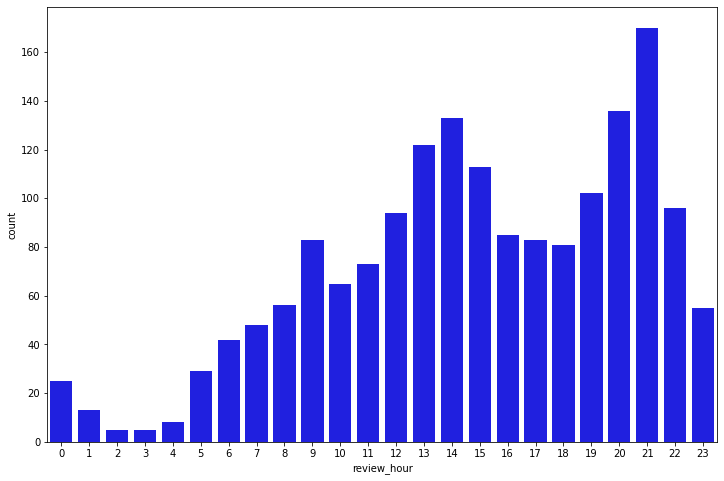

In [259]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='review_hour', color='blue')
plt.savefig('Pics/review_hour.jpg',bbox_inches='tight',dpi=200)

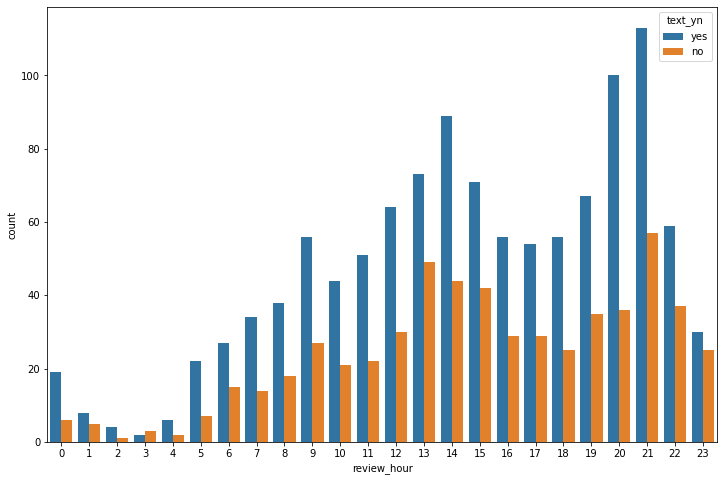

In [260]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='review_hour',hue='text_yn')
plt.savefig('Pics/review_hour_text_yn.jpg',bbox_inches='tight',dpi=200)

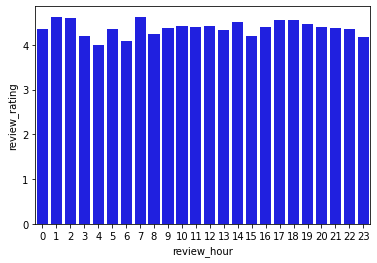

In [261]:
sns.barplot(x=df_hours.index,y=df_hours['review_rating'],color='blue')
plt.savefig('Pics/review_rating_hour.jpg',bbox_inches='tight',dpi=200)

In [262]:
df['review_weekday'] = df['review_datetime_utc'].apply(lambda x: x.day_name())
df['review_weekday'].head()

0    Monday
1    Monday
2    Sunday
3    Sunday
4    Sunday
Name: review_weekday, dtype: object

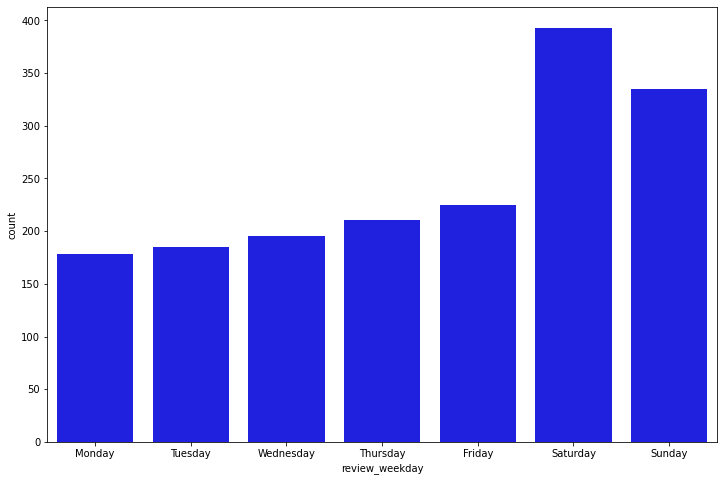

In [263]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='review_weekday', color='blue',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.savefig('Pics/review_weekday.jpg',bbox_inches='tight',dpi=200)

In [264]:
df['rating_rolling'] = df['review_rating'][::-1].rolling(window=25).mean()
df

,author_title,review_text,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_rating,review_datetime_utc,review_likes,text_yn,anwser_yn,review_hour,review_weekday,rating_rolling
0,Christian Díaz,(Translated by G...,NaN,NaN,NaN,5,2022-08-22 09:38:41,0,yes,no,9,Monday,4.64
1,Gabriela Santiana,Delicioso todo.....,NaN,NaN,NaN,5,2022-08-22 07:14:49,1,yes,no,7,Monday,4.64
2,Meir Cohen,Great restaurant...,NaN,NaN,NaN,4,2022-08-21 22:19:17,0,yes,no,22,Sunday,4.64
3,kaka kaka,Está demasiado b...,NaN,NaN,NaN,5,2022-08-21 20:35:31,1,yes,no,20,Sunday,4.68
4,Alberto Martinez,(Translated by G...,NaN,NaN,NaN,5,2022-08-21 16:00:01,1,yes,no,16,Sunday,4.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,Oski D,Brutal!!!!,(Translated by G...,1.553501e+09,03/25/2019 07:56:08,5,2019-03-23 13:31:49,3,yes,yes,13,Saturday,NaN
1718,Bcn Bcn,NaN,(Translated by G...,1.553500e+09,03/25/2019 07:53:14,5,2019-03-23 11:35:37,0,no,yes,11,Saturday,NaN
1719,Edu Martinez,(Translated by G...,(Translated by G...,1.553254e+09,03/22/2019 11:27:46,5,2019-03-22 10:31:04,4,yes,yes,10,Friday,NaN
1720,Ruben Vaquero,(Translated by G...,(Translated by G...,1.553500e+09,03/25/2019 07:51:56,5,2019-03-21 12:24:11,4,yes,yes,12,Thursday,NaN


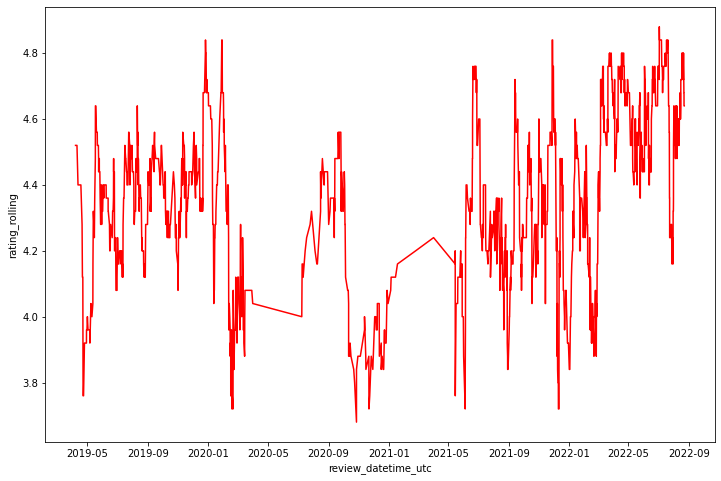

In [265]:
plt.figure(figsize=(12,8))
plt.tight_layout()
sns.lineplot(data=df,x='review_datetime_utc',y='rating_rolling',color='red')
plt.savefig('Pics/review_rating_rolling.jpg',bbox_inches='tight',dpi=200)

In [266]:
df['rating_cum'] = df['review_rating'][::-1].expanding().mean()

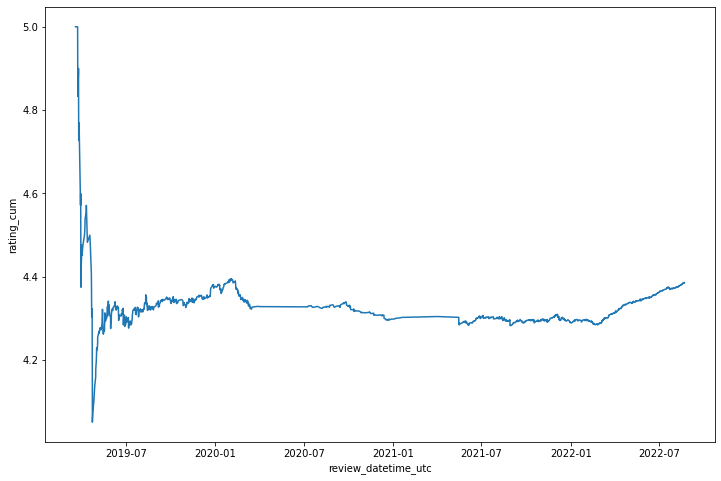

In [267]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df,x='review_datetime_utc',y='rating_cum')
plt.savefig('Pics/review_rating_cum.jpg',bbox_inches='tight',dpi=200)

In [268]:
df['review_time_diff'] = df['review_datetime_utc'].diff()/timedelta(hours=1)*(-1) 

In [269]:
df['review_time_diff']

0             NaN
1        2.397778
2        8.925556
3        1.729444
4        4.591667
          ...    
1717    11.348333
1718     1.936667
1719    25.075833
1720    22.114722
1721    53.157500
Name: review_time_diff, Length: 1722, dtype: float64

In [270]:
df[df['review_time_diff']==df['review_time_diff'].max()]

,author_title,review_text,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_rating,review_datetime_utc,review_likes,text_yn,anwser_yn,review_hour,review_weekday,rating_rolling,rating_cum,review_time_diff
1171,SERGIO SERGIUSTO,(Translated by G...,NaN,NaN,NaN,4,2020-03-31 11:13:43,0,yes,no,11,Tuesday,4.04,4.328494,2384.173611


In [271]:
delta = relativedelta.relativedelta(df['review_datetime_utc'].iloc[0], df['review_datetime_utc'].iloc[-1])
delta = delta.months + delta.years*12
delta

41

In [272]:
def func_delta_month(date):
    delta = relativedelta.relativedelta(date, df['review_datetime_utc'].iloc[-1])
    delta_month = delta.months + delta.years*12
    return delta_month

df['review_months'] = df['review_datetime_utc'].apply(func_delta_month)

In [273]:
df.head()

,author_title,review_text,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_rating,review_datetime_utc,review_likes,text_yn,anwser_yn,review_hour,review_weekday,rating_rolling,rating_cum,review_time_diff,review_months
0,Christian Díaz,(Translated by G...,NaN,NaN,NaN,5,2022-08-22 09:38:41,0,yes,no,9,Monday,4.64,4.386179,NaN,41
1,Gabriela Santiana,Delicioso todo.....,NaN,NaN,NaN,5,2022-08-22 07:14:49,1,yes,no,7,Monday,4.64,4.385822,2.397778,41
2,Meir Cohen,Great restaurant...,NaN,NaN,NaN,4,2022-08-21 22:19:17,0,yes,no,22,Sunday,4.64,4.385465,8.925556,41
3,kaka kaka,Está demasiado b...,NaN,NaN,NaN,5,2022-08-21 20:35:31,1,yes,no,20,Sunday,4.68,4.385689,1.729444,41
4,Alberto Martinez,(Translated by G...,NaN,NaN,NaN,5,2022-08-21 16:00:01,1,yes,no,16,Sunday,4.68,4.385332,4.591667,41


In [274]:
rev_months_rating = pd.Series(round(df.groupby('review_months')['review_rating'].mean(),1))

In [275]:
rev_months_counts = pd.Series(df.groupby('review_months')['review_rating'].count())

In [276]:
index = pd.Series(np.arange(0,df.groupby('review_months')['review_rating'].mean().index.max()+1))

In [277]:
df_months = pd.concat([index,rev_months_rating,rev_months_counts],axis=1,keys=['month','rev_months_rating','rev_months_counts'])
df_months.set_index(index)
df_months.head()

,month,rev_months_rating,rev_months_counts
0,0,4.5,31.0
1,1,4.2,36.0
2,2,4.3,40.0
3,3,4.4,41.0
4,4,4.3,52.0


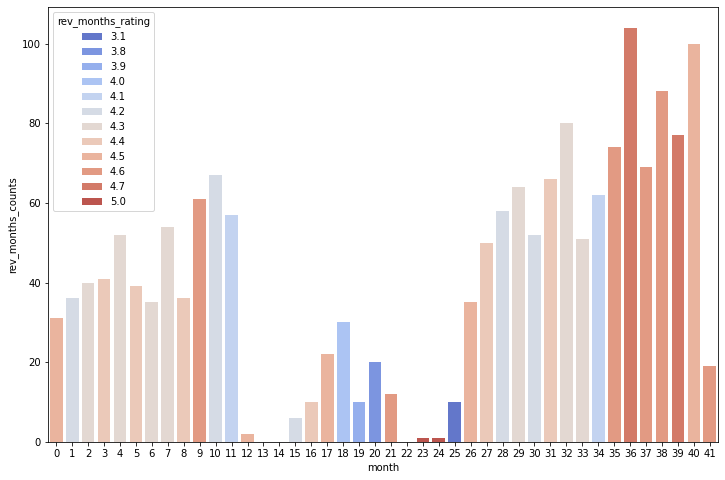

In [278]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_months, \
                 x='month', \
                 y='rev_months_counts', \
                 hue='rev_months_rating', \
                 dodge=False, \
                 palette="coolwarm")
plt.savefig('Pics/rating_mean_month.jpg',bbox_inches='tight',dpi=200)